In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [31]:
import os 
os.environ["PATH"] += os.pathsep + '/usr/local/bin'
plt.rcParams.update({'font.size': 10})
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams.update({
    "text.usetex": True,
})

In [32]:
df_x = pd.read_csv("../../data/1550/freq_vs_power/freqx_vs_power.csv")
df_x['power_w'] = np.power(10, df_x['power_z'].values/10)
df_x = df_x.sort_values(by='power_z')
df_x.head()

,power_z,freq_mean,freq_std,power_w
5,30.0,57823.187863,1691.291484,1000.000000
1,30.5,61172.124224,1491.225170,1122.018454
9,31.0,64773.630183,1613.699785,1258.925412
6,31.5,68659.385643,1702.516134,1412.537545
2,32.0,72772.843083,1666.092592,1584.893192


In [33]:
df_y = pd.read_csv("../../data/1550/freq_vs_power/freqy_vs_power.csv")
df_y['power_w'] = np.power(10, df_y['power_z'].values/10)
df_y = df_y.sort_values(by='power_z')
df_y.head()

,power_z,freq_mean,freq_std,power_w
5,30.0,61397.209431,6010.508125,1000.000000
1,30.5,64686.333287,5205.083886,1122.018454
9,31.0,68385.652381,3752.971550,1258.925412
6,31.5,72461.755884,2862.081955,1412.537545
2,32.0,76811.193518,2170.037462,1584.893192


In [34]:
df_z = pd.read_csv("../../data/1550/freq_vs_power/freqz_vs_power.csv")
df_z['power_w'] = np.power(10, df_z['power_z'].values/10)
df_z = df_z.sort_values(by='power_z')
df_z.head()

,power_z,freq_mean,freq_std,power_w
5,30.0,16728.894472,3.346784e+05,1000.000000
1,30.5,17738.336238,1.645142e+05,1122.018454
9,31.0,19574.660091,2.671674e+06,1258.925412
6,31.5,20670.910310,1.015348e+05,1412.537545
2,32.0,21667.712117,8.772571e+04,1584.893192


In [35]:
def simple_model(power, a):
    
    return a*np.sqrt(power)

In [36]:
ans_x, _ = curve_fit(simple_model, df_x['power_w'].values, df_x['freq_mean'].values)
ans_y, _ = curve_fit(simple_model, df_y['power_w'].values, df_y['freq_mean'].values)
ans_z, _ = curve_fit(simple_model, df_z['power_w'].values, df_z['freq_mean'].values)

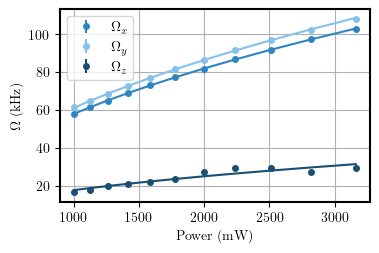

In [58]:
colors = ['#2E86C1', '#85C1E9', '#1B4F72']
fig = plt.figure(figsize=(5.4*1.3*10, 10*4.2))
fig.set_size_inches(2.5*1.6, 2.5, forward=True)

plt.errorbar(df_x['power_w'].values, df_x['freq_mean'].values/1e3, yerr=np.sqrt(df_x['freq_std'].values)/1e3, fmt='o', 
             color=colors[0], label=r'$\Omega_x$', markersize=4)
plt.plot(df_x['power_w'].values, simple_model(df_x['power_w'].values, *ans_x)/1e3, color=colors[0], label='_')
plt.errorbar(df_y['power_w'].values, df_y['freq_mean'].values/1e3, yerr=np.sqrt(df_y['freq_std'].values)/1e3, fmt='o',
              color=colors[1], label=r'$\Omega_y$', markersize=4)
plt.plot(df_x['power_w'].values, simple_model(df_x['power_w'].values, *ans_y)/1e3,color=colors[1], label='_')
plt.errorbar(df_z['power_w'].values, df_z['freq_mean'].values/1e3, yerr=np.sqrt(df_z['freq_std'].values)/1e3, fmt='o', 
             color=colors[2], label=r'$\Omega_z$', markersize=4)
plt.plot(df_x['power_w'].values, simple_model(df_x['power_w'].values, *ans_z)/1e3,color=colors[2], label='_')
#plt.yscale('log')
plt.grid()
plt.xlabel('Power (mW)')
plt.ylabel(r'$\Omega$ (kHz)')
#plt.xlim([2.3, 4e-5])
#plt.ylim([0.3, 400])
plt.legend()
plt.savefig('../../plots/Chapter 5/freq_vs_power.pdf', dpi=300, bbox_inches = 'tight')
plt.show()

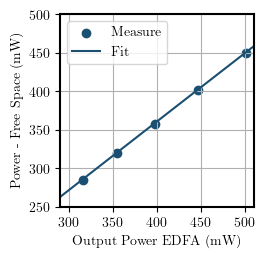

In [64]:
colors = ['#2E86C1', '#85C1E9', '#1B4F72']
fig = plt.figure(figsize=(5.4*1.3*10, 10*4.2))
fig.set_size_inches(2.5*1, 2.5, forward=True)

plt.grid()

output_edfa = np.array([25, 25.5, 26, 26.5, 27, 27.5])
measure_free_space = np.array([24.54965127, 25.04216281, 25.5365586, 26.03915562, 26.52870631, 27.01406451])
plt.scatter(10**(output_edfa/10), 10**(measure_free_space/10), color=colors[2], label='Measure')
x = np.linspace(24, 28, 100)
plt.plot(10**(x/10), 10**((0.988*x -0.141)/10), label='Fit', color=colors[2])

#plt.yscale('log')
plt.xlabel('Output Power EDFA (mW)')
plt.ylabel(r'Power - Free Space (mW)')
plt.xlim([290, 510])
plt.ylim([250, 500])
plt.xticks([300, 350, 400, 450, 500])
plt.legend()
plt.savefig('../../plots/Chapter 5/out_power_vs_space_power.pdf', dpi=300, bbox_inches = 'tight')
plt.show()

